**732_Saksham Msc_DSAI(ML)**

<h3 style="color:red">Aim : Demonstrate Data Imputation with statistical techinique on Numerical values and write down the conclusion about the Assumption</h3>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Dataset/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [92]:
# to check null varlue percentages

df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [22]:
df.shape

(891, 4)

In [16]:
# independent columns

x = df.drop(columns = ['Survived'])

In [18]:
#dependent columns

y = df['Survived']

In [20]:
# import

from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=2)

In [23]:
x_train.shape

(712, 3)

In [24]:
x_test.shape

(179, 3)

In [26]:
# to check mean median of original data

df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [32]:
# checking Mean

mean_age = x_train['Age'].mean()

mean_age

29.78590425531915

In [33]:
# checking Median

median_age = x_train['Age'].median()

median_age

28.75

In [34]:
# checking Mean

mean_fare = x_train['Fare'].mean()

mean_fare

32.617596893491076

In [37]:
# checking Median

median_fare = x_train['Fare'].median()

median_fare

14.4583

## Imputation

In [45]:
# making new columns with filling Nulls with mean and median

x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Age_median'] = x_train['Age'].fillna(median_age)


# fare mean and median

x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)

In [46]:
# check new columns

x_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [59]:
print("Before Imputation Age variance: ", round(x_train['Age'].var() ,2) )

# age mean

print("After Imputation Age variance : ", round(x_train['Age_mean'].var() , 2 ) )

# age median

print("After Imputation Age variance : ", round(x_train['Age_median'].var() , 2 ) )

Before Imputation Age variance:  204.35
After Imputation Age variance :  161.81
After Imputation Age variance :  161.99


In [61]:
print("Before Imputation Fare variance: ", round(x_train['Fare'].var() ,2) )

# age mean

print("After Imputation Fare variance : ", round(x_train['Fare_mean'].var() , 2 ) )

# age median

print("After Imputation Fare variance : ", round(x_train['Fare_median'].var() , 2 ) )

Before Imputation Fare variance:  2448.2
After Imputation Fare variance :  2324.24
After Imputation Fare variance :  2340.09


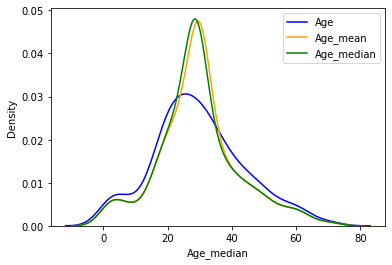

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.distplot(x_train['Age'], hist = False, color = "blue")
sns.distplot(x_train['Age_mean'], hist = False, color = "orange")
sns.distplot(x_train['Age_median'], hist = False, color = "green")

plt.legend(labels=['Age', 'Age_mean', 'Age_median'])

**As in above data Age missing values are 19% , so after Imputation , distribution is completely chnaged.**

**So don't apply Imputation here**

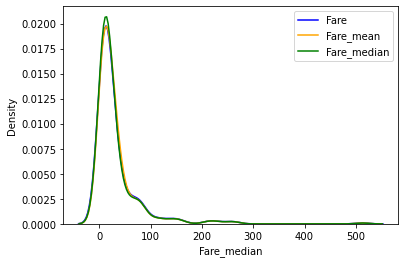

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.distplot(x_train['Fare'], hist = False, color = "blue")
sns.distplot(x_train['Fare_mean'], hist = False, color = "orange")
sns.distplot(x_train['Fare_median'], hist = False, color = "green")

plt.legend(labels=['Fare', 'Fare_mean', 'Fare_median'])

**As in above data Fare missing values are 5% , so after Imputation , distribution is almost same.**

**So we can apply Imputation here**

**--------------------------------------------------------------------------------------------------------------**

**To directly fill mean , median values**

In [84]:
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

In [85]:
imputer_1 = SimpleImputer(strategy='mean')

imputer_2 = SimpleImputer(strategy='median')

In [86]:
trf = ColumnTransformer([
    ('imputer_1',imputer_1,['Age']),
    ('imputer_2',imputer_2,['Age'])
    
], remainder='passthrough')

In [88]:
trf.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_1', SimpleImputer(), ['Age']),
                                ('imputer_2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [89]:
trf.named_transformers_['imputer_1'].statistics_

array([29.69911765])

In [90]:
trf.named_transformers_['imputer_2'].statistics_

array([28.])

<h3><u>Conclusion : </u> As seen in above data Age column has 19% missing values , after applying Imputation on Age column the distribution of Age values is completely changed. So we cannot apply Imputation ojn Age column it will give incorrect data.
      Same as we apply Imputation on Fare column where missing values are 5% and after Imputation distribution of fare values is almost same or similar so we can apply Imputation here.</h3>
      
<h3><u>Assumption : </u> As we tried on above data we can say that , Apply Imputation where missing values are less or equal to 5% , If missing values are more that 5% , Imputation will give incorrect data.</h3>